## This notebook illustrates how to animate the phase plot of the Van Der Pol Oscillator in the Week 4 tutorial

It uses the interactive plotting of Jupyter, which some people may have had issues with in the first week - this is generally solved by cleaning up the general python environment and having only the required python modules imported in the virtual environment used.

In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib notebook

In [2]:
# Solve the equation for several VDP oscillators with a range of initial conditions

damping_factor = 1.0

def calculate_dydt(t, y):
    dydt = np.zeros_like(y)
    dydt[1] = damping_factor * (1 - y[0]**2) * y[1] - y[0]
    dydt[0] = y[1]
    return dydt

# generate dimension 2 initial condition [y0,v0]
def get_random_initial_conditions(): 
    return (4.0*np.random.rand(2) - 2.0)

max_time = 40.0
num_time_points = 400
time_data = np.linspace(0.0, max_time, num_time_points)
num_oscillators = 10
linedata = []
for y0 in [get_random_initial_conditions() for i in range(num_oscillators)]:
    solution = solve_ivp(calculate_dydt, [0,max_time], y0, t_eval=time_data)
    linedata.append(solution.y)

<IPython.core.display.Javascript object>


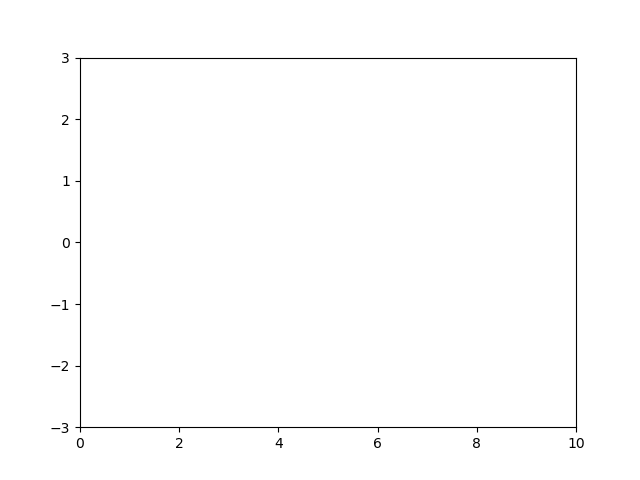

In [3]:
# Animate the oscillations for each of the oscillators

fig = plt.figure()
ax = plt.axes(xlim=(0,num_oscillators), ylim=(-3, 3))
# note the comma! plot() returns a list of Line2D objects, 
# and we want the line itself, not the list of lines
line, = ax.plot([], [], 'ro')

def init():
    line.set_data([],[])
    return line, #note the comma!

def animate(i):
    line.set_data([1+np.arange(num_oscillators)],
                  [l[0][i] for l in linedata])

    return line, #note the comma!

# Create the FuncAnimation object, passing the figure object,
# and the animate() and init() functions that we have defined above
# NB, interval is in milliseconds
# NB2, blit means we only update things that have changed
anim = animation.FuncAnimation(fig, animate, init_func=init,
                                frames=num_time_points, interval=50, blit=True)

<IPython.core.display.Javascript object>


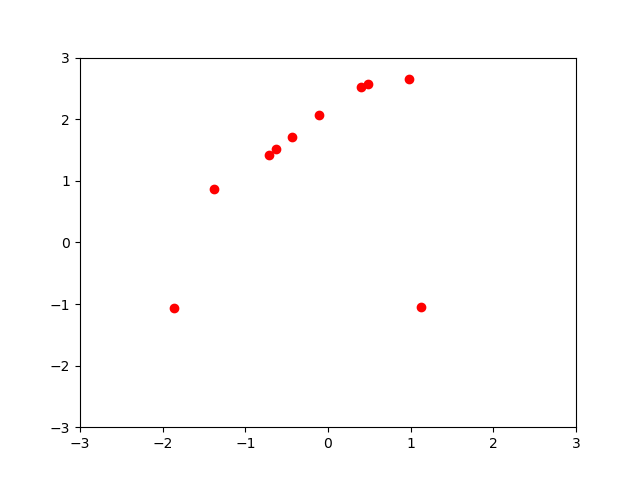

/opt/homebrew/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


In [4]:
# Animate the phase plot of their motions in y-v space to see the limit cycles

fig = plt.figure()
ax = plt.axes(xlim=(-3,3), ylim=(-3, 3))
# note the comma! plot() returns a list of Line2D objects, 
# and we want the line itself, not the list of lines
line, = ax.plot([], [], 'ro')

def init():
    line.set_data([],[])
    return line, #note the comma!

def animate(i):
    line.set_data([l[0][i] for l in linedata],
                  [l[1][i]for l in linedata])

    return line, #note the comma!

# Create the FuncAnimation object, passing the figure object,
# and the animate() and init() functions that we have defined above
# NB, interval is in milliseconds
# NB2, blit means we only update things that have changed
anim = animation.FuncAnimation(fig, animate, init_func=init,
                                frames=num_time_points, interval=50, blit=True)